In [309]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/srmfinalpre/PREPROCESSED_DATASET.csv
/kaggle/input/srmdatathon-final/Final_Strictly_Corrected_Dataset_v5.csv


In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostRegressor


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import lightgbm as lgb
from catboost import CatBoostRegressor


#  **PREPROCESSING:**

In [311]:
df = pd.read_csv('/kaggle/input/srmfinalpre/PREPROCESSED_DATASET.csv')


In [312]:
df.head()

,Unnamed: 0,Un_Named,Date,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region
0,0,0,3/15/2025,Backhoe Loader,-0.034464,3534,35000,1,1,5000.56,CUST00001,Sherrichester
1,1,1,1/1/2019,Excavators(crawler),0.034464,80,35,1,1,5000.56,CUST00002,North Ryanstad
2,2,2,1/1/2019,Loaders (Wheeled),0.034464,70,35,1,1,5000.56,CUST00003,South Christophermouth
3,3,3,1/1/2019,Skid Steer Loaders,0.034464,70,35,1,1,5000.56,CUST00004,Juliashire
4,4,4,1/1/2019,Compactors,0.034464,68,35,1,1,5000.56,CUST00005,Davidberg


In [313]:
duplicated_rows = df[df.duplicated(keep=False)]

# Count occurrences of each duplicated row
duplicate_counts = duplicated_rows.value_counts()

# Print duplicate counts (if any)
if not duplicate_counts.empty:
    print("Duplicate rows and their counts:")
    print(duplicate_counts)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [314]:
df = df.drop(columns=['Unnamed: 0', 'Un_Named'], errors='ignore')

# Check for missing values in all columns
missing_values = df.isnull().sum()

missing_values

Date                          0
Infrastructure_Machineries    0
Daily_Sales _Percentage       0
Daily_Sales_Quantity          0
Market_Share                  0
Political                     0
Marketing                     0
Budget                        0
Customer_Id                   0
Region                        0
dtype: int64

In [315]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime format

# Replace '3/15/2025' with NaT (null value)
df.loc[df['Date'] == '2025-03-15', 'Date'] = pd.NaT

# Fill missing dates with the preceding value, and if none exists, use the next available value
df['Date'] = df['Date'].fillna(method='ffill').fillna(method='bfill')


Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


In [316]:
df.to_csv("PPDATA.csv", index=False)


In [317]:
df_og=df.copy()

In [318]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df = df.drop(columns=['Date'])  # Drop original Date column after feature extraction


In [319]:
df

,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,Backhoe Loader,-0.034464,3534,35000,1,1,5000.56,CUST00001,Sherrichester,1,1,1
1,Excavators(crawler),0.034464,80,35,1,1,5000.56,CUST00002,North Ryanstad,1,1,1
2,Loaders (Wheeled),0.034464,70,35,1,1,5000.56,CUST00003,South Christophermouth,1,1,1
3,Skid Steer Loaders,0.034464,70,35,1,1,5000.56,CUST00004,Juliashire,1,1,1
4,Compactors,0.034464,68,35,1,1,5000.56,CUST00005,Davidberg,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2190,Backhoe Loader,0.034464,79,35,1,1,5000.56,CUST02191,East Dominiqueshire,1,12,4
2191,Excavators(crawler),0.034464,67,35,1,1,5000.56,CUST02192,Troyside,1,1,1
2192,Loaders (Wheeled),0.034464,70,35,1,1,5000.56,CUST02193,Dodsonport,1,1,1
2193,Skid Steer Loaders,0.034464,89,35,1,1,5000.56,CUST02194,North Johnland,1,1,1


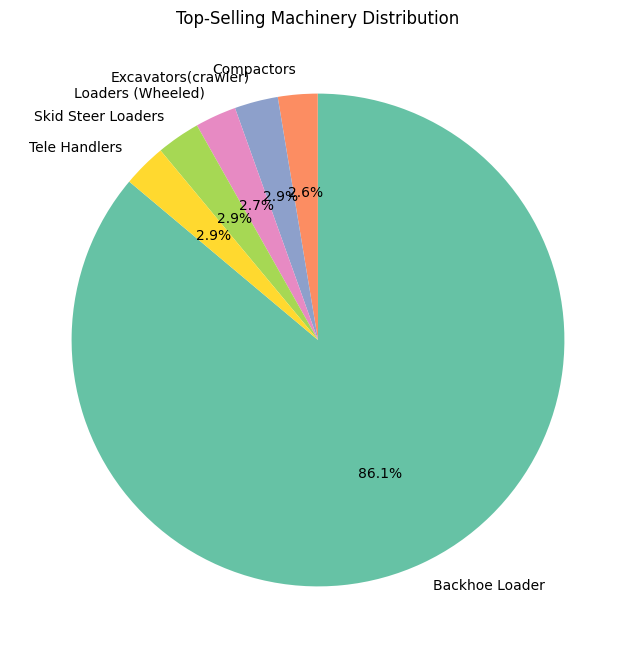

In [371]:
## 4. Top-Selling Machinery (Pie Chart)
machine_sales = df_og.groupby('Infrastructure_Machineries')['Daily_Sales_Quantity'].sum()

plt.figure(figsize=(8, 8))
plt.pie(machine_sales, labels=machine_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top-Selling Machinery Distribution')
plt.show()

In [320]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = [
    "Infrastructure_Machineries", "Daily_Sales _Percentage", "Daily_Sales_Quantity",
    "Market_Share", "Political", "Marketing", "Budget", "Customer_Id", "Region"
]

# Apply label encoding
label_encoders = {}
for col in columns_to_encode:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders if needed for inverse transformation

# Checking the first few rows after encoding
df.head()


,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,0,10,163,1,0,1,0,0,1699,1,1,1
1,2,51,105,0,0,1,0,1,1357,1,1,1
2,3,51,95,0,0,1,0,2,1756,1,1,1
3,4,51,95,0,0,1,0,3,668,1,1,1
4,1,51,93,0,0,1,0,4,226,1,1,1


In [321]:
df

,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,0,10,163,1,0,1,0,0,1699,1,1,1
1,2,51,105,0,0,1,0,1,1357,1,1,1
2,3,51,95,0,0,1,0,2,1756,1,1,1
3,4,51,95,0,0,1,0,3,668,1,1,1
4,1,51,93,0,0,1,0,4,226,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2190,0,51,104,0,0,1,0,2190,317,1,12,4
2191,2,51,92,0,0,1,0,2191,1963,1,1,1
2192,3,51,95,0,0,1,0,2192,251,1,1,1
2193,4,51,114,0,0,1,0,2193,1288,1,1,1


In [322]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Budget', 'Market_Share', 'Daily_Sales _Percentage']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [323]:
df.head(30)

,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,0,-3.103424,163,4.122112,0,1,-1.205013,0,1699,1,1,1
1,2,0.573657,105,-0.242594,0,1,-1.205013,1,1357,1,1,1
2,3,0.573657,95,-0.242594,0,1,-1.205013,2,1756,1,1,1
3,4,0.573657,95,-0.242594,0,1,-1.205013,3,668,1,1,1
4,1,0.573657,93,-0.242594,0,1,-1.205013,4,226,1,1,1
5,5,0.573657,86,-0.242594,0,1,-1.205013,5,2031,1,1,1
6,0,1.291136,76,-0.242594,0,1,-1.205013,6,1110,2,1,1
7,2,1.291136,93,-0.242594,0,1,-1.205013,7,1901,2,1,1
8,3,1.291136,110,-0.242594,0,1,-1.205013,8,1275,2,1,1
9,4,1.291136,89,-0.242594,0,1,-1.205013,9,1813,2,1,1


In [324]:
df['Daily_Sales_Quantity'] = np.log1p(df['Daily_Sales_Quantity'])  # log(1+x) to handle zero values


In [325]:
df

,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Political,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,0,-3.103424,5.099866,4.122112,0,1,-1.205013,0,1699,1,1,1
1,2,0.573657,4.663439,-0.242594,0,1,-1.205013,1,1357,1,1,1
2,3,0.573657,4.564348,-0.242594,0,1,-1.205013,2,1756,1,1,1
3,4,0.573657,4.564348,-0.242594,0,1,-1.205013,3,668,1,1,1
4,1,0.573657,4.543295,-0.242594,0,1,-1.205013,4,226,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2190,0,0.573657,4.653960,-0.242594,0,1,-1.205013,2190,317,1,12,4
2191,2,0.573657,4.532599,-0.242594,0,1,-1.205013,2191,1963,1,1,1
2192,3,0.573657,4.564348,-0.242594,0,1,-1.205013,2192,251,1,1,1
2193,4,0.573657,4.744932,-0.242594,0,1,-1.205013,2193,1288,1,1,1


In [326]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['Daily_Sales_Quantity'])  # Target is Daily Sales Quantity
y = df['Daily_Sales_Quantity']

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features to analyze
selector.fit(X, y)

# Get feature scores and sort them
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display top features
print(feature_scores)


                       Feature        Score
4                    Marketing  2167.394037
2                 Market_Share   481.220015
10                     Quarter   162.087821
9                        Month   155.999915
6                  Customer_Id   144.335781
5                       Budget    98.544037
1      Daily_Sales _Percentage    86.623934
0   Infrastructure_Machineries    20.633770
7                       Region     1.983041
8                  Day_of_Week     0.582058
3                    Political     0.000000


# FEATURE IMPORTANCE

In [327]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a basic Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df)


                       Feature  Importance
4                    Marketing    0.499697
2                 Market_Share    0.196922
1      Daily_Sales _Percentage    0.163541
6                  Customer_Id    0.052291
7                       Region    0.048119
0   Infrastructure_Machineries    0.015831
8                  Day_of_Week    0.015034
9                        Month    0.004569
5                       Budget    0.002466
10                     Quarter    0.001530
3                    Political    0.000000


In [328]:
df = df.drop(columns=['Political'], errors='ignore')


In [329]:
df

,Infrastructure_Machineries,Daily_Sales _Percentage,Daily_Sales_Quantity,Market_Share,Marketing,Budget,Customer_Id,Region,Day_of_Week,Month,Quarter
0,0,-3.103424,5.099866,4.122112,1,-1.205013,0,1699,1,1,1
1,2,0.573657,4.663439,-0.242594,1,-1.205013,1,1357,1,1,1
2,3,0.573657,4.564348,-0.242594,1,-1.205013,2,1756,1,1,1
3,4,0.573657,4.564348,-0.242594,1,-1.205013,3,668,1,1,1
4,1,0.573657,4.543295,-0.242594,1,-1.205013,4,226,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2190,0,0.573657,4.653960,-0.242594,1,-1.205013,2190,317,1,12,4
2191,2,0.573657,4.532599,-0.242594,1,-1.205013,2191,1963,1,1,1
2192,3,0.573657,4.564348,-0.242594,1,-1.205013,2192,251,1,1,1
2193,4,0.573657,4.744932,-0.242594,1,-1.205013,2193,1288,1,1,1


In [330]:
df1=df.copy()

<Axes: >

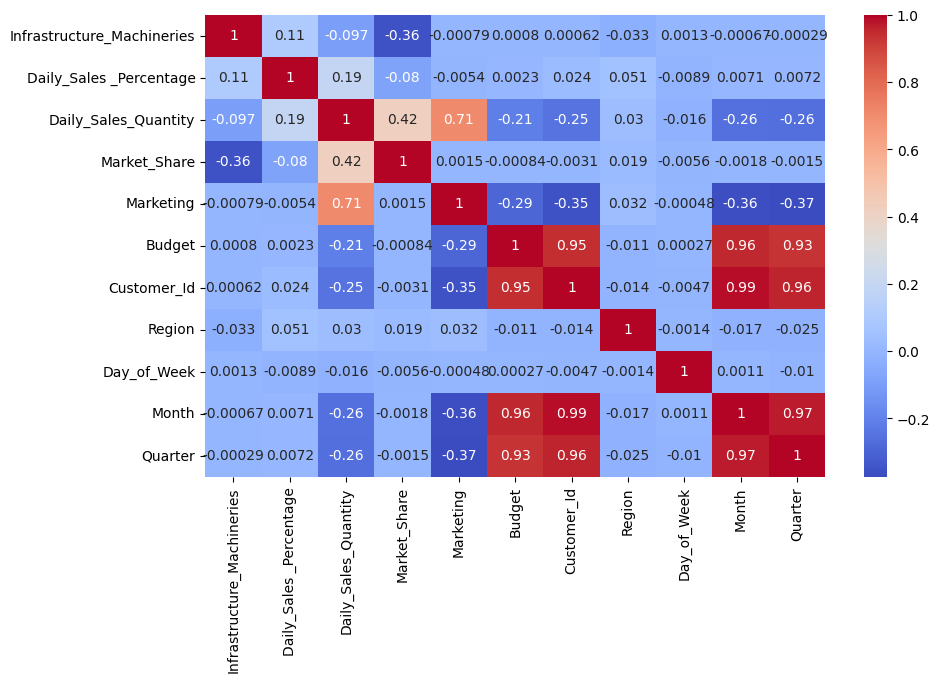

In [331]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')





In [332]:
from sklearn.model_selection import TimeSeriesSplit

# Define features and target variable
X = df.drop(['Daily_Sales_Quantity'], axis=1)
y = df['Daily_Sales_Quantity']

# Split using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)


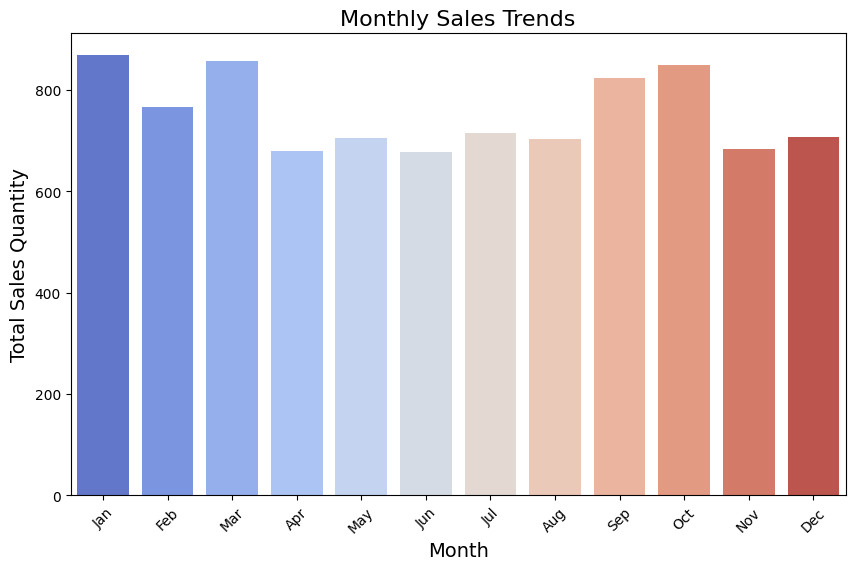

In [340]:
# Group by month and calculate total sales for each month
monthly_sales = df.groupby('Month')['Daily_Sales_Quantity'].sum()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Quantity', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.show()

# MODELS:

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# Initialize LightGBM model
model = LGBMRegressor(n_estimators=1000, learning_rate=0.05)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Train the model on training data (use the last split for validation)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Manually track early stopping
    best_mae = float('inf')
    best_iteration = 0
    patience = 50  # Early stopping rounds
    no_improve_count = 0

    for n_estimators in range(50, 1001, 50):  # Train incrementally
        model.n_estimators = n_estimators
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        if mae < best_mae:
            best_mae = mae
            best_iteration = n_estimators
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print(f"Early stopping at iteration {best_iteration}")
            break

    print("Final MAE:", best_mae)


In [334]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions from the model
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAPE: {mape}%")



MAE: 0.21536935459019385
MSE: 0.09555138230087454
RMSE: 0.30911386623843734
R² Score: 0.5899785717285303
MAPE: 7.023298693756706%


In [335]:
import optuna
import shap
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data (Assuming X, y are preprocessed features & target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR² Score: {r2:.4f}")
    return mae, mse, rmse, r2




In [ ]:
# Optuna Hyperparameter Tuning for LightGBM
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
    }
    model = LGBMRegressor(**params)
    model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    eval_metric="mae",  
   
)

    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective_lgbm, n_trials=30)
best_params_lgbm = study.best_params
print("Best LightGBM Parameters:", best_params_lgbm)

# Train LightGBM with Best Params
lgbm_model = LGBMRegressor(**best_params_lgbm)
lgbm_model.fit(X_train, y_train)
evaluate_model(lgbm_model, X_test, y_test)




In [337]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# LightGBM Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Compute KPIs
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print Metrics for LightGBM
print("📌 LightGBM Metrics:")
print(f"MAE:  {mae_lgbm:.4f}")
print(f"MSE:  {mse_lgbm:.4f}")
print(f"RMSE: {rmse_lgbm:.4f}")
print(f"R² Score: {r2_lgbm:.4f}")


📌 LightGBM Metrics:
MAE:  0.1519
MSE:  0.0499
RMSE: 0.2235
R² Score: 0.8178


In [ ]:
# Optuna Hyperparameter Tuning for CatBoost
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 3, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'verbose': False
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)


study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_catboost, n_trials=30)
best_params_cat = study_cat.best_params
print("Best CatBoost Parameters:", best_params_cat)

# Train CatBoost with Best Params
cat_model = CatBoostRegressor(**best_params_cat)
cat_model.fit(X_train, y_train)
evaluate_model(cat_model, X_test, y_test)

# Feature Importance with SHAP
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [339]:
# CatBoost Predictions
y_pred_catboost = cat_model.predict(X_test)

# Compute KPIs
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

# Print Metrics for CatBoost
print("📌 CatBoost Metrics:")
print(f"MAE:  {mae_catboost:.4f}")
print(f"MSE:  {mse_catboost:.4f}")
print(f"RMSE: {rmse_catboost:.4f}")
print(f"R² Score: {r2_catboost:.4f}")




📌 CatBoost Metrics:
MAE:  0.1693
MSE:  0.0764
RMSE: 0.2765
R² Score: 0.7212


In [341]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import linprog


# Data Preprocessing
df.dropna(inplace=True)  # Handle missing values


# Define Features & Target
X = df.drop(["Daily_Sales_Quantity"], axis=1)
y = df["Daily_Sales_Quantity"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")



MAE: 0.1691331476698305, RMSE: 0.26508823597054954


In [342]:
y_pred = xgb_model.predict(X_test)

# Compute KPIs
mae_catboost = mean_absolute_error(y_test, y_pred)
mse_catboost = mean_squared_error(y_test, y_pred)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred)

# Print Metrics for CatBoost
print("📌 XGBOOST Metrics:")
print(f"MAE:  {mae_catboost:.4f}")
print(f"MSE:  {mse_catboost:.4f}")
print(f"RMSE: {rmse_catboost:.4f}")
print(f"R² Score: {r2_catboost:.4f}")


📌 XGBOOST Metrics:
MAE:  0.1691
MSE:  0.0703
RMSE: 0.2651
R² Score: 0.7437


**SHAP ANALYSIS FOR XGBOOST:**

**SHAP ANALYSIS FOR LGBM:**

AS LIGHTGBM IS THE BEST MODEL , WE GO FOR ITS SHAP ANALYSIS:

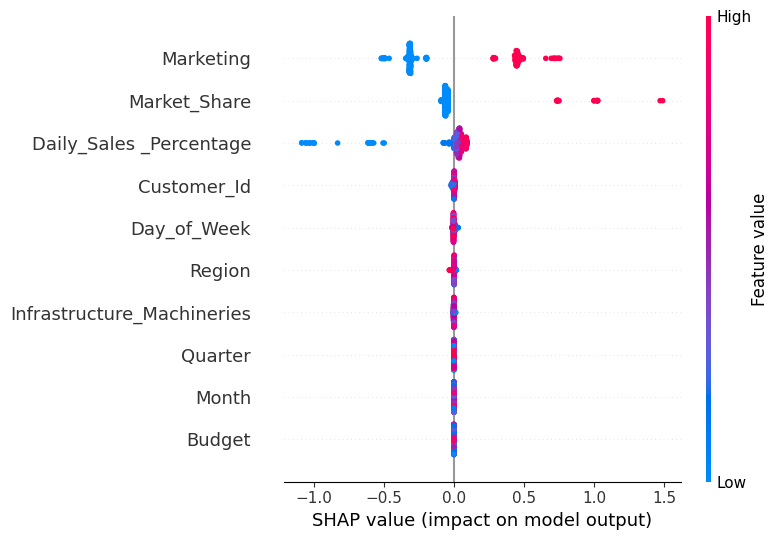

In [344]:
# Feature Importance using SHAP
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [353]:
X_input = df[['Infrastructure_Machineries', 'Daily_Sales _Percentage', 'Market_Share', 
              'Marketing', 'Budget', 'Customer_Id', 'Region', 
              'Day_of_Week', 'Month', 'Quarter']]


In [354]:
log_predicted_demand = lgbm_model.predict(X_input)


In [355]:
predicted_demand = np.expm1(log_predicted_demand)


In [356]:
predicted_demand

array([161.86090512,  93.0506612 ,  93.22973211, ...,  93.31209742,
        92.96099263,  92.92545314])

# TEST DATA:

In [360]:
test_df = pd.read_csv('/kaggle/input/test-data/input_data.csv')


In [361]:
# Convert Date column to datetime
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Day_of_Week'] = test_df['Date'].dt.dayofweek  
test_df['Month'] = test_df['Date'].dt.month
test_df['Quarter'] = test_df['Date'].dt.quarter
test_df = test_df.drop(columns=['Date'])  # Drop Date column


In [362]:
columns_to_encode = [
    "Infrastructure_Machineries", "Daily_Sales _Percentage", 
    "Market_Share", "Political", "Marketing", "Budget", 
    "Customer_Id", "Region"
]

for col in columns_to_encode:
    if col in test_df.columns and col in label_encoders:
        test_df[col] = label_encoders[col].transform(test_df[col])


In [363]:
scaled_columns = ['Budget', 'Market_Share', 'Daily_Sales _Percentage']

test_df[scaled_columns] = scaler.transform(test_df[scaled_columns])  # Use the same scaler from training


In [365]:
test_df = test_df.drop(columns=['Political'], errors='ignore')

In [366]:
log_predicted_sales = lgbm_model.predict(test_df)


In [367]:
predicted_sales = np.expm1(log_predicted_sales)
test_df['Predicted_Daily_Sales_Quantity'] = predicted_sales


In [368]:
print(test_df[['Infrastructure_Machineries', 'Predicted_Daily_Sales_Quantity']])


   Infrastructure_Machineries  Predicted_Daily_Sales_Quantity
0                           1                       94.683092
1                           3                       93.118477
2                           4                       93.050661
3                           0                       93.229732
4                           2                       92.737983
5                           5                       93.229732
